In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import scikitplot as skplt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
def _get_path(radius, level, i):
    return './sameslicethickness/different_distances/radius_' + str(radius) + '/level_' + str(level) + '/volumes/v' + str(i) + '.npy'

In [3]:
class Normalizer:
    def __init__(self, data):
        self.min = np.min(data)
        self.max = np.max(data)
    
    def normalize(self, newdata):
        return (newdata - self.min)/(self.max - self.min)

# Old

In [2]:
model_path = './models/binary_classifier_with_sigmoid'
model = tf.keras.models.load_model(model_path)

In [63]:
n = 20
h,w,d = 64, 64, 28
data = []
label = []
distance = []
for radius in [10, 20, 40]:
    for level in [1, 5]:
        for i in range(n):
            try:
                data.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
            except :
                continue
            if level < 3:
                label.append(0)
            else :
                label.append(1)
            distance.append(radius)

In [64]:
data = np.array(data)
label = np.array(label)
distance = np.array(distance)

In [65]:
data.shape

(120, 64, 64, 28, 1)

In [67]:
scaler = Normalizer(data)
test = scaler.normalize(data)
print(np.max(test))
print(np.min(test))

1.0
0.0


In [68]:
test = tf.data.Dataset.from_tensor_slices((data, label))
test = test.batch(4)
pred = model.predict(test)

In [69]:
ev = model.evaluate(test)

30/30 [==============================] - 1s 28ms/step - loss: 7653.4463 - accuracy: 0.3917


In [70]:
prob = np.argmax(pred, axis = 1)

In [71]:
len(prob)

120

In [72]:
norm = Normalizer(prob)
prob_2 = norm.normalize(prob)

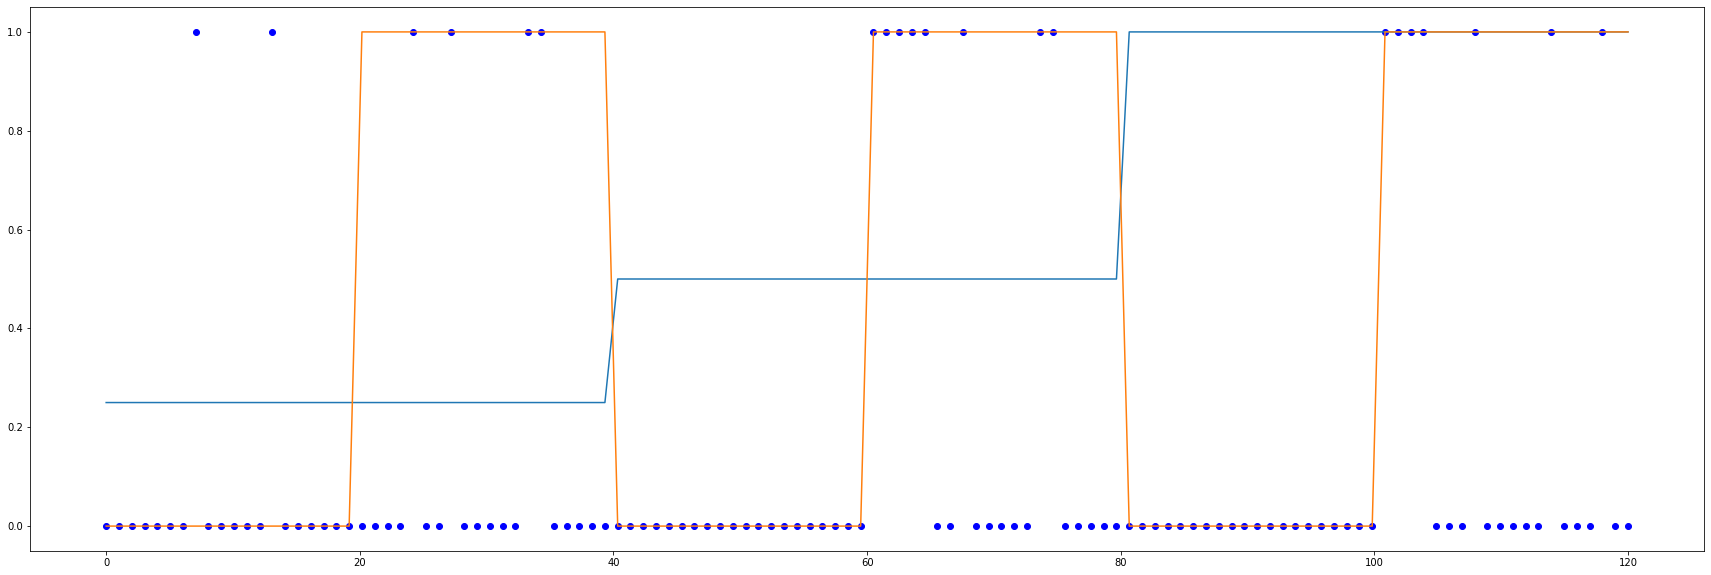

In [73]:
linspace = np.linspace(0, len(prob), len(prob))
plt.figure(figsize=(30,10))
plt.plot(linspace, prob, 'bo', label = 'probability') # dots
plt.plot(linspace, distance/40, label = 'distance') # green
plt.plot(linspace, label, label = 'label') #orange
plt.show()

# Compare different distances
In this trial, we are going to train a new model between level 1 vs level 5, using the three different radii.

## Training Data loading

In [4]:
def get_binary_training_data(radius, n = 1000, size = (64,64,28), levels=[1, 5]):
    h,w,d = size
    
    data = []
    label = []
    
    for level in levels:
        for i in tqdm(range(n)):
            try:
                data.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
            except :
                continue
            if level < 3:
                label.append(0)
            else :
                label.append(1)
    return data, label

def data_prep(data, labels, BATCH_SIZE = 32, SHUFFLE_BUFFER_SIZE = 100):
    train_ds, valid_ds, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=42)
    print("number of training examples: ", len(train_ds))
    print("number of validation examples: ", len(valid_ds))
    scaler = Normalizer(train_ds)
    train_ds = scaler.normalize(train_ds)
    valid_ds = scaler.normalize(valid_ds)
    print("max of training dataset: ", np.max(train_ds), " & min: ", np.min(train_ds))
    print("max of validation dataset: ", np.max(valid_ds), " & min: ", np.min(valid_ds))
    train_dataset = tf.data.Dataset.from_tensor_slices((train_ds, y_train))
    validation_dataset = tf.data.Dataset.from_tensor_slices((valid_ds, y_valid))

    train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
    validation_dataset = validation_dataset.batch(BATCH_SIZE)
    return train_dataset, validation_dataset

### Loading radius 30

In [5]:
data_30, label_30 = get_binary_training_data(radius = 30, n = 1000, size = (64,64,28), levels=[1, 5])
train_30, val_30 = data_prep(data_30, label_30)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

number of training examples:  1465
number of validation examples:  367
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.026085097284584136


### Loading radius 50

In [5]:
data_50, label_50 = get_binary_training_data(radius = 50, n = 1000, size = (64,64,28), levels=[1, 5])
train_50, val_50 = data_prep(data_50, label_50)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

number of training examples:  1384
number of validation examples:  346
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0


### Loading radius 10, 20, 40

In [4]:
n = 1000
h,w,d = 64, 64, 28

data_10 = []
label_10 = []

radius = 10
for level in [1, 5]:
    for i in tqdm(range(n)):
        try:
            data_10.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            label_10.append(0)
        else :
            label_10.append(1)

data_20 = []
label_20 = []
radius = 20
for level in [1, 5]:
    for i in tqdm(range(n)):
        try:
            data_20.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            label_20.append(0)
        else :
            label_20.append(1)
            
data_40 = []
label_40 = []
radius = 40
for level in [1, 5]:
    for i in tqdm(range(n)):
        try:
            data_40.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            label_40.append(0)
        else :
            label_40.append(1)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
train_10, val_10 = data_prep(data_10, label_10)
train_20, val_20 = data_prep(data_20, label_20)
train_40, val_40 = data_prep(data_40, label_40)

number of training examples:  1510
number of validation examples:  378
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0
number of training examples:  1481
number of validation examples:  371
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.023305537737866155
number of training examples:  1395
number of validation examples:  349
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0


# Training

In [6]:
def get_cnn_model(h=64,w=64,d=28):
    n_classes = 1
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(h,w,d, 1)),
        tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling3D(),
        tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling3D(),
        tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(128, 1, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling3D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(n_classes, activation='sigmoid')
    ])
    return model

## Training radius 10

In [7]:
n_classes = 1
model_r10 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(h,w,d, 1)),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(128, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

In [8]:
model_r10.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model_r10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 64, 64, 28, 16)    2016      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 64, 64, 28, 16)    32016     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 64, 28, 32)    13856     
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 28, 32)    128       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 32, 32, 14, 32)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 32, 32, 14, 32)    27680     
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 32, 32, 14, 32)    2

In [9]:
epochs = 15
history = model_r10.fit(
  train_10,
  validation_data=val_10,
  epochs=epochs
)

Epoch 1/15
48/48 [==============================] - 42s 645ms/step - loss: 1.1274 - accuracy: 0.7715 - val_loss: 0.8711 - val_accuracy: 0.5026
Epoch 2/15
48/48 [==============================] - 29s 600ms/step - loss: 0.1937 - accuracy: 0.9146 - val_loss: 0.7226 - val_accuracy: 0.5873
Epoch 3/15
48/48 [==============================] - 29s 601ms/step - loss: 0.1117 - accuracy: 0.9497 - val_loss: 0.7138 - val_accuracy: 0.6640
Epoch 4/15
48/48 [==============================] - 29s 602ms/step - loss: 0.0804 - accuracy: 0.9649 - val_loss: 0.7082 - val_accuracy: 0.7381
Epoch 5/15
48/48 [==============================] - 29s 601ms/step - loss: 0.0605 - accuracy: 0.9768 - val_loss: 0.7476 - val_accuracy: 0.7857
Epoch 6/15
48/48 [==============================] - 29s 602ms/step - loss: 0.0480 - accuracy: 0.9808 - val_loss: 0.2681 - val_accuracy: 0.8968
Epoch 7/15
48/48 [==============================] - 29s 603ms/step - loss: 0.0404 - accuracy: 0.9841 - val_loss: 0.1728 - val_accuracy: 0.9312

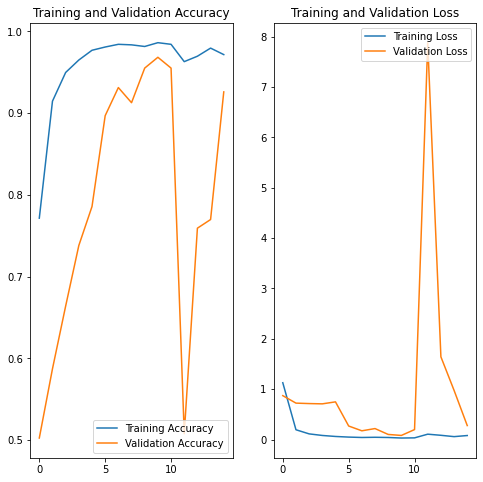

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 20

In [20]:
n_classes = 1
model_r20 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(h,w,d, 1)),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(128, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

In [21]:
model_r20.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [22]:
history = model_r20.fit(
  train_20,
  validation_data=val_20,
  epochs=epochs
)

Epoch 1/15
47/47 [==============================] - 32s 647ms/step - loss: 1.2582 - accuracy: 0.6962 - val_loss: 0.7217 - val_accuracy: 0.5364
Epoch 2/15
47/47 [==============================] - 28s 599ms/step - loss: 0.3269 - accuracy: 0.8575 - val_loss: 1.4107 - val_accuracy: 0.5337
Epoch 3/15
47/47 [==============================] - 28s 602ms/step - loss: 0.1543 - accuracy: 0.9386 - val_loss: 2.1760 - val_accuracy: 0.5822
Epoch 4/15
47/47 [==============================] - 28s 601ms/step - loss: 0.1326 - accuracy: 0.9507 - val_loss: 2.0285 - val_accuracy: 0.5930
Epoch 5/15
47/47 [==============================] - 28s 603ms/step - loss: 0.0822 - accuracy: 0.9723 - val_loss: 2.1370 - val_accuracy: 0.5903
Epoch 6/15
47/47 [==============================] - 28s 604ms/step - loss: 0.0785 - accuracy: 0.9723 - val_loss: 1.8067 - val_accuracy: 0.6469
Epoch 7/15
47/47 [==============================] - 28s 605ms/step - loss: 0.1150 - accuracy: 0.9575 - val_loss: 1.3909 - val_accuracy: 0.6712

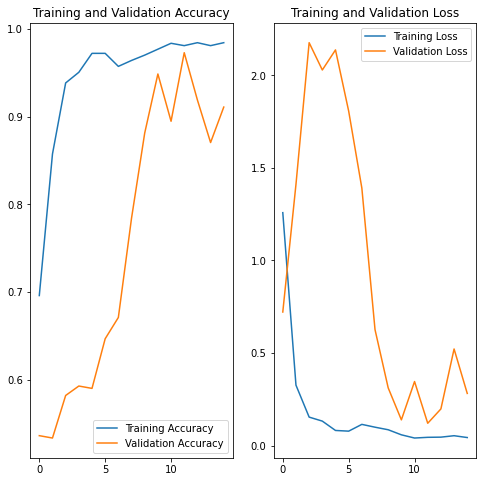

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 40

In [27]:
n_classes = 1
model_r40 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(h,w,d, 1)),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(128, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

In [28]:
model_r40.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [29]:
history = model_r40.fit(
  train_40,
  validation_data=val_40,
  epochs=epochs
)

Epoch 1/15
44/44 [==============================] - 67s 2s/step - loss: 1.8828 - accuracy: 0.5842 - val_loss: 0.6988 - val_accuracy: 0.5530
Epoch 2/15
44/44 [==============================] - 27s 610ms/step - loss: 0.5369 - accuracy: 0.7290 - val_loss: 0.6836 - val_accuracy: 0.5845
Epoch 3/15
44/44 [==============================] - 27s 610ms/step - loss: 0.4207 - accuracy: 0.8050 - val_loss: 2.2792 - val_accuracy: 0.5759
Epoch 4/15
44/44 [==============================] - 27s 614ms/step - loss: 0.3213 - accuracy: 0.8581 - val_loss: 1.9513 - val_accuracy: 0.5587
Epoch 5/15
44/44 [==============================] - 27s 614ms/step - loss: 0.2634 - accuracy: 0.8839 - val_loss: 2.3536 - val_accuracy: 0.5186
Epoch 6/15
44/44 [==============================] - 27s 615ms/step - loss: 0.1744 - accuracy: 0.9376 - val_loss: 3.7367 - val_accuracy: 0.4785
Epoch 7/15
44/44 [==============================] - 27s 615ms/step - loss: 0.1441 - accuracy: 0.9513 - val_loss: 2.0772 - val_accuracy: 0.5731
Ep

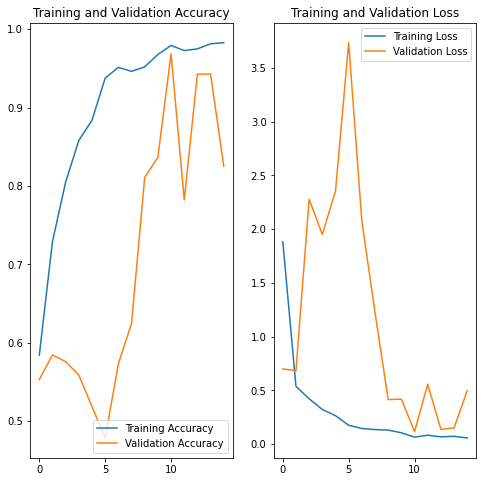

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 10, 20, 40

In [7]:
n_classes = 1
model_rAll = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(h,w,d, 1)),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
    tf.keras.layers.Conv3D(128, 1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling3D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='sigmoid')
])

In [8]:
model_rAll.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [9]:
train_data = train_40.concatenate(train_20)
train_data = train_data.concatenate(train_10)
train_data = train_data.shuffle(200)

val_data = val_40.concatenate(val_20)
val_data = val_data.concatenate(val_10)
val_data = val_data.shuffle(200)

In [10]:
epochs = 6
history = model_rAll.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/6
139/139 [==============================] - 106s 655ms/step - loss: 1.0226 - accuracy: 0.7020 - val_loss: 2.3806 - val_accuracy: 0.5228
Epoch 2/6
139/139 [==============================] - 85s 600ms/step - loss: 0.3932 - accuracy: 0.8174 - val_loss: 1.3091 - val_accuracy: 0.5665
Epoch 3/6
139/139 [==============================] - 85s 602ms/step - loss: 0.2722 - accuracy: 0.8782 - val_loss: 0.9462 - val_accuracy: 0.5974
Epoch 4/6
139/139 [==============================] - 86s 604ms/step - loss: 0.1994 - accuracy: 0.9156 - val_loss: 1.3983 - val_accuracy: 0.6703
Epoch 5/6
139/139 [==============================] - 86s 605ms/step - loss: 0.1480 - accuracy: 0.9346 - val_loss: 1.0144 - val_accuracy: 0.6548
Epoch 6/6
139/139 [==============================] - 86s 605ms/step - loss: 0.1417 - accuracy: 0.9398 - val_loss: 1.4345 - val_accuracy: 0.6029


In [11]:
model_rAll.save('./models/model_rAll')

INFO:tensorflow:Assets written to: ./models/model_rAll\assets


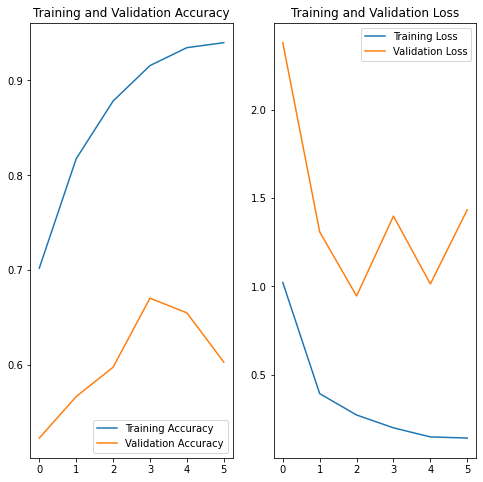

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 30

In [7]:
model_r30 = get_cnn_model()
model_r30.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
epochs = 15
history = model_r30.fit(
  train_30,
  validation_data=val_30,
  epochs=epochs
)
model_r30.save('./models/model_r30')

Epoch 1/15
46/46 [==============================] - 46s 688ms/step - loss: 1.9000 - accuracy: 0.6765 - val_loss: 0.9056 - val_accuracy: 0.5831
Epoch 2/15
46/46 [==============================] - 28s 608ms/step - loss: 0.4184 - accuracy: 0.8273 - val_loss: 1.6385 - val_accuracy: 0.5722
Epoch 3/15
46/46 [==============================] - 28s 608ms/step - loss: 0.2116 - accuracy: 0.9099 - val_loss: 2.8858 - val_accuracy: 0.5422
Epoch 4/15
46/46 [==============================] - 28s 608ms/step - loss: 0.1935 - accuracy: 0.9283 - val_loss: 4.0449 - val_accuracy: 0.5232
Epoch 5/15
46/46 [==============================] - 28s 609ms/step - loss: 0.1987 - accuracy: 0.9249 - val_loss: 1.5862 - val_accuracy: 0.5967
Epoch 6/15
46/46 [==============================] - 28s 609ms/step - loss: 0.1293 - accuracy: 0.9495 - val_loss: 0.9699 - val_accuracy: 0.7003
Epoch 7/15
46/46 [==============================] - 28s 611ms/step - loss: 0.0735 - accuracy: 0.9727 - val_loss: 0.5281 - val_accuracy: 0.8038

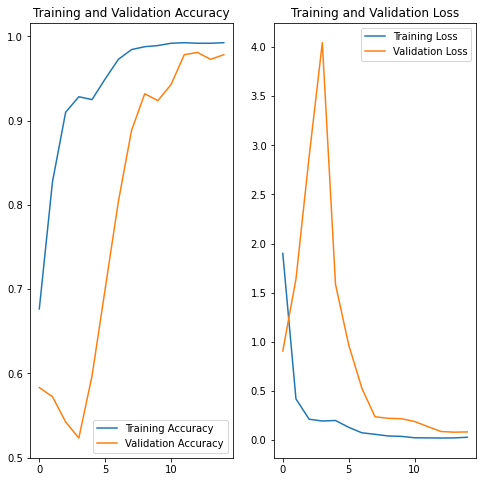

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 50

In [7]:
model_r50 = get_cnn_model()
model_r50.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
epochs = 15
history = model_r50.fit(
  train_50,
  validation_data=val_50,
  epochs=epochs
)
model_r50.save('./models/model_r50')

Epoch 1/15
44/44 [==============================] - 37s 664ms/step - loss: 1.5138 - accuracy: 0.6315 - val_loss: 0.7030 - val_accuracy: 0.5607
Epoch 2/15
44/44 [==============================] - 27s 603ms/step - loss: 0.5268 - accuracy: 0.7688 - val_loss: 0.9454 - val_accuracy: 0.5347
Epoch 3/15
44/44 [==============================] - 27s 604ms/step - loss: 0.3656 - accuracy: 0.8410 - val_loss: 0.7632 - val_accuracy: 0.5983
Epoch 4/15
44/44 [==============================] - 27s 605ms/step - loss: 0.2437 - accuracy: 0.8967 - val_loss: 0.9075 - val_accuracy: 0.6243
Epoch 5/15
44/44 [==============================] - 27s 607ms/step - loss: 0.1738 - accuracy: 0.9256 - val_loss: 3.0622 - val_accuracy: 0.5145
Epoch 6/15
44/44 [==============================] - 27s 609ms/step - loss: 0.1246 - accuracy: 0.9509 - val_loss: 4.1982 - val_accuracy: 0.5260
Epoch 7/15
44/44 [==============================] - 27s 610ms/step - loss: 0.1048 - accuracy: 0.9610 - val_loss: 0.8120 - val_accuracy: 0.7110

NameError: name 'model_r30' is not defined

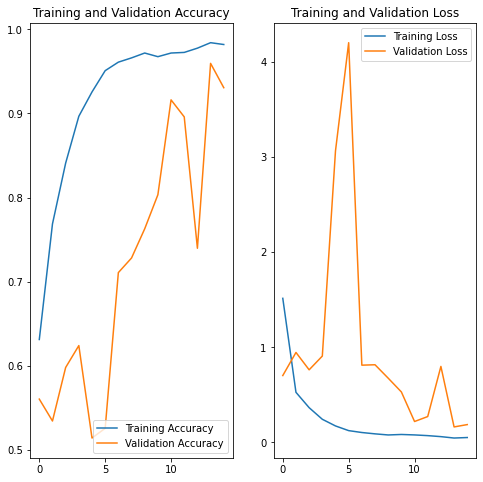

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing 

In [4]:
def get_binary_testing_data(radius, n1 = 1000, n2=2000, size = (64,64,28), levels=[1, 5]):
    h,w,d = size
    
    data = []
    label = []
    
    for level in levels:
        for i in tqdm(range(n1, n2)):
            try:
                data.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
            except :
                continue
            if level < 3:
                label.append(0)
            elif level > 3:
                label.append(1)
    return data, label

In [5]:
def test_data_prep(data, labels, BATCH_SIZE = 32):
    print('data length = ', len(labels))
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return test_data

In [7]:
radii = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
test = []
for r in radii:
    t, l = get_binary_testing_data(radius = r, n1 = 0, n2 = 500)
    test.append(test_data_prep(t, l))

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  1000
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  1000
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  1000
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  980
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  976
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  972
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  952
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  920
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  914
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  914
max of training dataset:  1.0  & min:  0.0


In [8]:
m10 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r10')
m20 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r20')
m30 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r30')
m40 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r40')
m50 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r50')
models = [m10, m20, m30, m40, m50]

In [9]:
results = {'m10': [], 'm20': [], 'm30': [], 'm40': [], 'm50': []}
for test_data in tqdm(test):
    for m in range(1, len(models) + 1):
        model_no = str(m * 10)
        model_name = 'm' + model_no
        r = models[m-1].evaluate(test_data)
        results[model_name].append(r[1])

  0%|          | 0/10 [00:00<?, ?it/s]

29/29 [==============================] - 5s 156ms/step - loss: 0.0595 - accuracy: 0.9683


In [10]:
pd.DataFrame(results).to_csv('./sameslicethickness/different_distances/m10-to-m50-results-0500sample.csv')

## Load Testing Data 10, 20, 40

In [13]:
n = 1000
n2 = 2000
h,w,d = 64, 64, 28

test_10 = []
test_label_10 = []

radius = 10
for level in [1, 5]:
    for i in tqdm(range(n, n2)):
        try:
            test_10.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            test_label_10.append(0)
        else :
            test_label_10.append(1)

test_20 = []
test_label_20 = []
radius = 20
for level in [1, 5]:
    for i in tqdm(range(n, n2)):
        try:
            test_20.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            test_label_20.append(0)
        else :
            test_label_20.append(1)
            
test_40 = []
test_label_40 = []
radius = 40
for level in [1, 5]:
    for i in tqdm(range(n, n2)):
        try:
            test_40.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            test_label_40.append(0)
        else :
            test_label_40.append(1)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
def test_data_prep(data, labels, BATCH_SIZE = 32):
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return test_data

test_10 = test_data_prep(data_10, label_10)
test_20 = test_data_prep(data_20, label_20)
test_40 = test_data_prep(data_40, label_40)

max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0


## Results

### Model trained on radius 10 results

In [15]:
model_r10.evaluate(test_10)
model_r10.evaluate(test_20)
model_r10.evaluate(test_40)

NameError: name 'model_r10' is not defined

### Model trained on radius 20 results

In [26]:
model_r20.evaluate(test_10)
model_r20.evaluate(test_20)
model_r20.evaluate(test_40)

55/55 [==============================] - 9s 153ms/step - loss: 3.9234 - accuracy: 0.5247


[3.9234087467193604, 0.5246559381484985]

### Model trained on radius 40 results

In [32]:
model_r40.evaluate(test_10)
model_r40.evaluate(test_20)
model_r40.evaluate(test_40)

55/55 [==============================] - 9s 152ms/step - loss: 0.4920 - accuracy: 0.8257


[0.491988867521286, 0.8256880640983582]

In [16]:
model_rAll.evaluate(test_10)
model_rAll.evaluate(test_20)
model_rAll.evaluate(test_40)

55/55 [==============================] - 10s 166ms/step - loss: 1.2667 - accuracy: 0.5092


[1.2666913270950317, 0.5091742873191833]

## Loading malignant data only

In [17]:
mal_10 = []
mal_label_10 = []
radius = 10
level = 5
for i in tqdm(range(n, n2)):
    try:
        mal_10.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
    except :
        continue
    if level < 3:
        mal_label_10.append(0)
    else :
        mal_label_10.append(1)
        
mal_20 = []
mal_label_20 = []
radius = 20
level = 5
for i in tqdm(range(n, n2)):
    try:
        mal_20.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
    except :
        continue
    if level < 3:
        mal_label_20.append(0)
    else :
        mal_label_20.append(1)
        
mal_40 = []
mal_label_40 = []
radius = 40
level = 5
for i in tqdm(range(n, n2)):
    try:
        mal_40.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
    except :
        continue
    if level < 3:
        mal_label_40.append(0)
    else :
        mal_label_40.append(1)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [18]:
maltest_10 = test_data_prep(mal_10, mal_label_10)
maltest_20 = test_data_prep(mal_20, mal_label_20)
maltest_40 = test_data_prep(mal_40, mal_label_40)

max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0


In [20]:
model_rAll.evaluate(maltest_10)
model_rAll.evaluate(maltest_20)
model_rAll.evaluate(maltest_40)

8/8 [==============================] - 1s 143ms/step - loss: 2.3331 - accuracy: 0.2712


[2.3331305980682373, 0.2711864411830902]

# Results in Figures

In [65]:
model_r10 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r10')
model_r20 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r20')
model_r40 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r40')

In [50]:
def predict_for_roc(model, test):
    pred = model.predict(test).ravel()
    complement = 1 - pred
    return np.array([complement, pred]).T
roc_pred_r10 = predict_for_roc(model_r10, test_10)

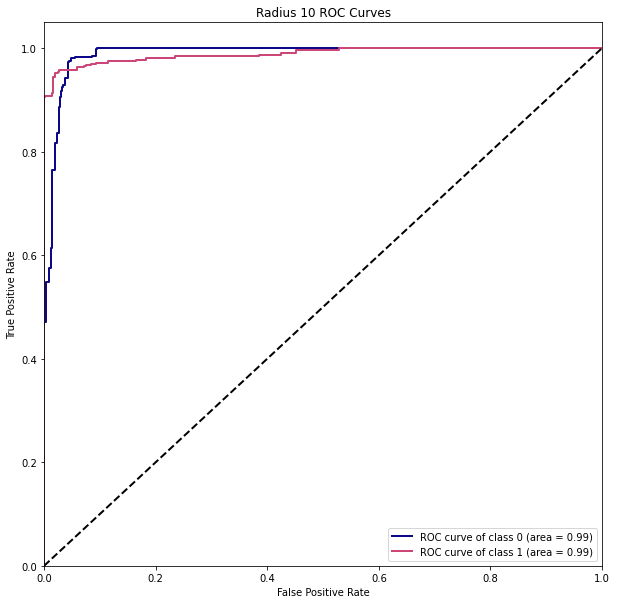

In [64]:
skplt.metrics.plot_roc(np.array(label_10), roc_pred_r10, 
                       title = "Radius 10 ROC Curves", 
                       plot_micro=False, plot_macro=False, 
                       figsize=(10,10), cmap='plasma')
plt.savefig('./figs/roc_r10.jpg')
plt.show()

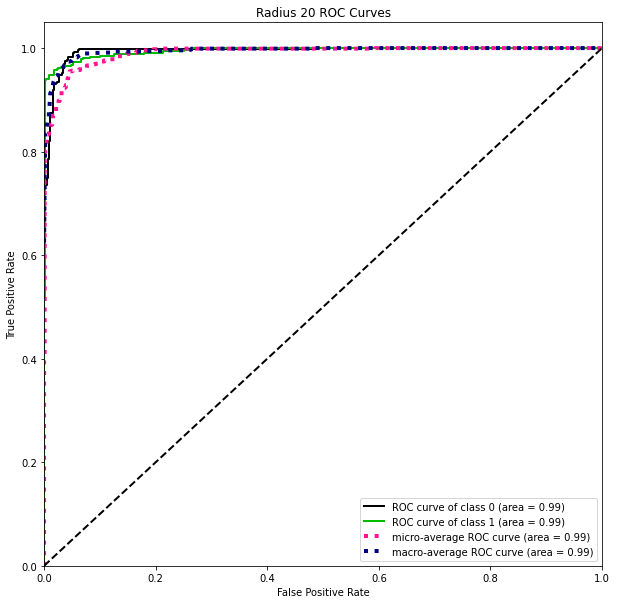

In [69]:
roc_pred_r20 = predict_for_roc(model_r20, test_20)
skplt.metrics.plot_roc(np.array(label_20), roc_pred_r20, 
                       title = "Radius 20 ROC Curves", 
                       plot_micro=True, plot_macro=True, 
                       figsize=(10,10))
plt.savefig('./figs/roc_r20_micromacro.jpg')
plt.show()

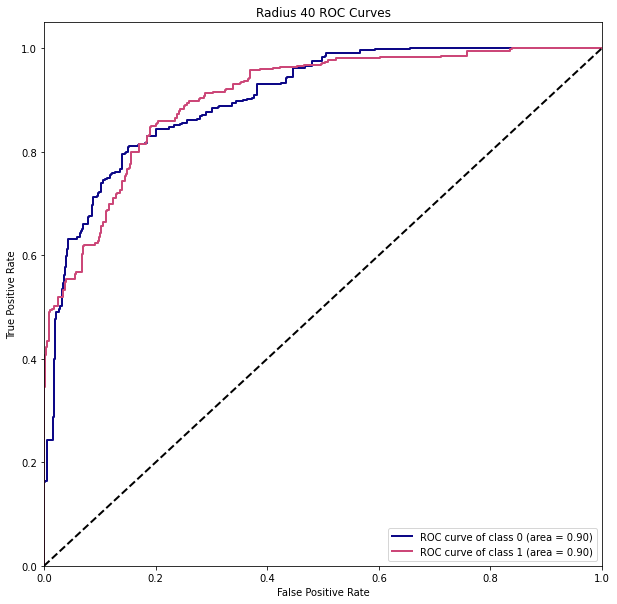

In [71]:
roc_pred_r40 = predict_for_roc(model_r40, test_40)
skplt.metrics.plot_roc(np.array(label_40), roc_pred_r40, 
                       title = "Radius 40 ROC Curves", 
                       plot_micro=False, plot_macro=False, 
                       figsize=(10,10), cmap='plasma')
plt.savefig('./figs/roc_r40.jpg')
plt.show()